# Data Visualization of Prosper Loans 
## by Sheryl Mathias

## Investigation Overview

The goal of this presentation is to understand what factors affect a borrower's APR while lending a loan. 

## Dataset Overview

There are 113,937 loans available in the dataset and for this project I have shortlisted 16 features namely: 
Term, BorrowerRate, ListingCreationDate, EmploymentStatus, EmploymentStatusDuration, Listing Category, StatedMonthlyIncome, AvailableBankcreditCard, LoanOriginalAmount, Occupation, Prosper Rating, Loan Status and Borrower APR. 

Apart from EmploymentStatus, Occupation and Loan Status, rest of the variables are numeric in nature. 

In [1]:
#import all packages
import pandas as pd
import numpy as np
import datetime
pd.set_option('display.max_colwidth', -1)
pd.set_option('display.max_columns', None)

import matplotlib.pyplot as plt
import seaborn as sn

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [2]:
# load in the dataset into a pandas dataframe
loan_data = pd.read_csv('prosperLoanData.csv')
prosperLoanData = loan_data[['Term','BorrowerRate','ListingCreationDate','EmploymentStatus','EmploymentStatusDuration',
                            'ListingCategory (numeric)','StatedMonthlyIncome','AvailableBankcardCredit','LoanOriginalAmount',
                            'Occupation','ProsperRating (Alpha)','LoanStatus','BorrowerAPR']]
prosperLoanData.head()

Term  BorrowerRate            ListingCreationDate EmploymentStatus  \
0  36    0.1580        2007-08-26 19:09:29.263000000  Self-employed     
1  36    0.0920        2014-02-27 08:28:07.900000000  Employed          
2  36    0.2750        2007-01-05 15:00:47.090000000  Not available     
3  36    0.0974        2012-10-22 11:02:35.010000000  Employed          
4  36    0.2085        2013-09-14 18:38:39.097000000  Employed          

   EmploymentStatusDuration  ListingCategory (numeric)  StatedMonthlyIncome  \
0  2.0                       0                          3083.333333           
1  44.0                      2                          6125.000000           
2 NaN                        0                          2083.333333           
3  113.0                     16                         2875.000000           
4  44.0                      2                          9583.333333           

   AvailableBankcardCredit  LoanOriginalAmount     Occupation  \
0  1500.0                   9425                Other           
1  10266.0                  10000               Professional    
2 NaN                       3001                Other           
3  30754.0                  10000               Skilled Labor   
4  695.0                    15000               Executive       

  ProsperRating (Alpha) LoanStatus  BorrowerAPR  
0  NaN                   Completed  0.16516      
1  A                     Current    0.12016      
2  NaN                   Completed  0.28269      
3  A                     Current    0.12528      
4  D                     Current    0.24614

## Univariate Exploration

### Distribution of the main variable of interest: BorrowerAPR.

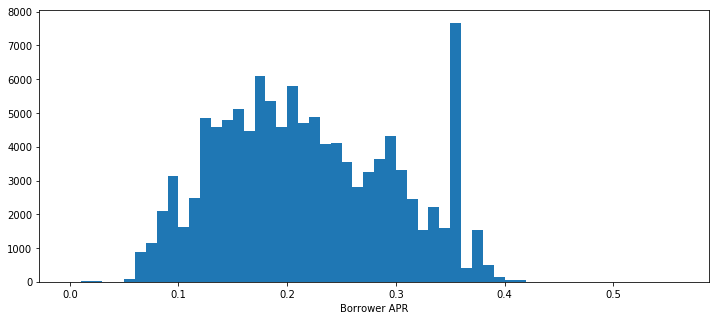

In [3]:
binsize = 0.05
bins = np.arange(0, prosperLoanData['BorrowerAPR'].max()+binsize, 0.01)

plt.figure(figsize=[12, 5])
plt.hist(data = prosperLoanData, x = 'BorrowerAPR', bins = bins)
plt.xlabel('Borrower APR')
plt.show()

### Distribution of Borrower's interest rate

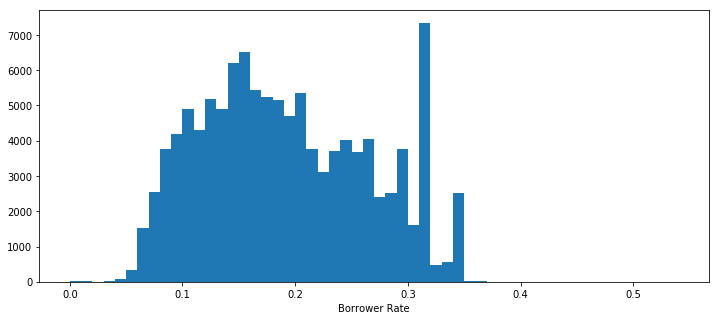

In [4]:
binsize = 0.05
bins = np.arange(0, prosperLoanData['BorrowerRate'].max()+binsize, 0.01)

plt.figure(figsize=[12, 5])
plt.hist(data = prosperLoanData, x = 'BorrowerRate', bins = bins)
plt.xlabel('Borrower Rate')
plt.show()

In [5]:
#Creating a subset where Borrower's APR is not null as we are trying to analyze the impact of other features on
#this dependant variable. 
prosperLoans = prosperLoanData[prosperLoanData['BorrowerAPR'].notna()]
prosperLoans = prosperLoans.reset_index()
prosperLoans.shape

(113912, 14)

### Distribution of StatedMonthlyIncome

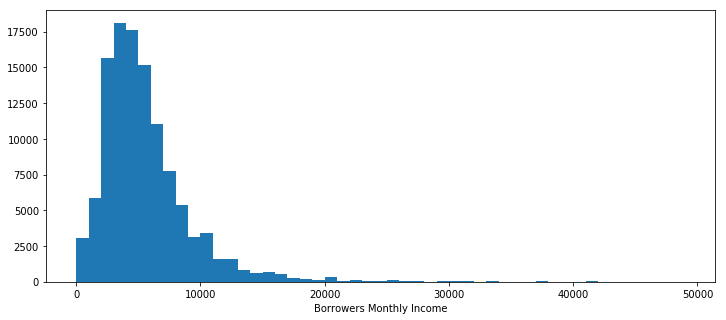

In [6]:
binsize = 1000
bins = np.arange(0, 50000, 1000)

plt.figure(figsize=[12, 5])
plt.hist(data = prosperLoans, x = 'StatedMonthlyIncome', bins = bins)
plt.xlabel('Borrowers Monthly Income')
plt.show()

In [7]:
prosperLoans = prosperLoanData[prosperLoanData['StatedMonthlyIncome'] <= 30000]
prosperLoans = prosperLoans.reset_index()

### Distribution of borrower's original loan amount

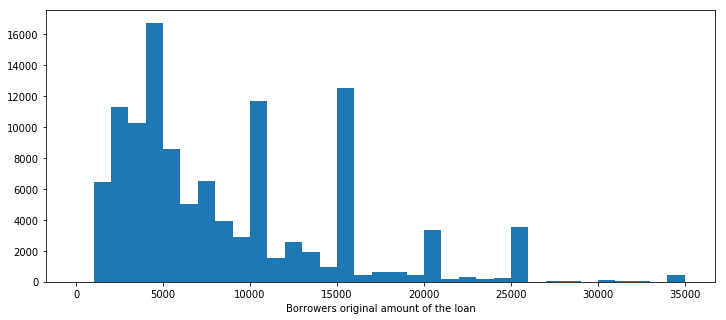

In [8]:
binsize = 1000
bins = np.arange(0, prosperLoans['LoanOriginalAmount'].max() + binsize, 1000)

plt.figure(figsize=[12, 5])
plt.hist(data = prosperLoans, x = 'LoanOriginalAmount', bins = bins)
plt.xlabel('Borrowers original amount of the loan')
plt.show()

In [9]:
#Check for null values in EmploymentStatus column and rename those as Not available
prosperLoans['EmploymentStatus'].fillna("Not available", inplace = True) 

### Bar chart of number of loans taken across Employment Status

[Text(0,0,'Employed'),
 Text(0,0,'Full-time'),
 Text(0,0,'Not available'),
 Text(0,0,'Self-employed'),
 Text(0,0,'Other'),
 Text(0,0,'Part-time'),
 Text(0,0,'Not employed'),
 Text(0,0,'Retired')]

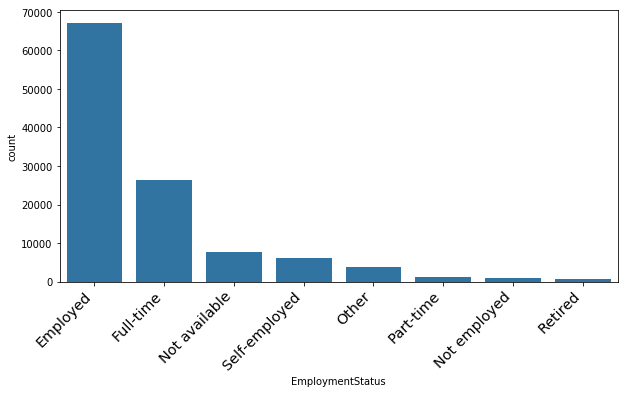

In [10]:
#Bar chart of EmploymentStatus
plt.figure(figsize=(10,5))
base_color = sn.color_palette()[0]
cat_order = prosperLoans['EmploymentStatus'].value_counts().index
chart = sn.countplot(data = prosperLoans, x = 'EmploymentStatus', color = base_color, order = cat_order)
chart.set_xticklabels(
    chart.get_xticklabels(), 
    rotation=45, 
    horizontalalignment='right',
    fontweight='light',
    fontsize='x-large')

### Bar chart of number of loans taken across loan term

[Text(0,0,'36'), Text(0,0,'60'), Text(0,0,'12')]

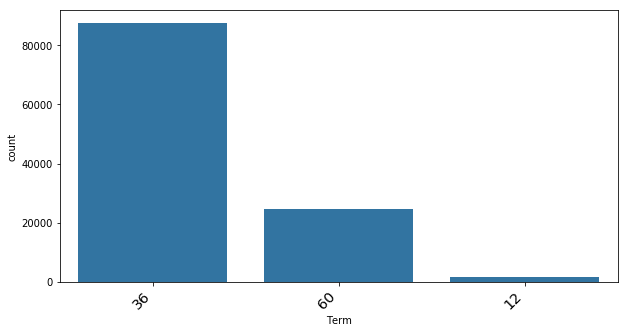

In [11]:
#Bar chart of loan Term
plt.figure(figsize=(10,5))
base_color = sn.color_palette()[0]
cat_order = prosperLoans['Term'].value_counts().index
chart = sn.countplot(data = prosperLoans, x = 'Term', color = base_color, order = cat_order)
chart.set_xticklabels(
    chart.get_xticklabels(), 
    rotation=45, 
    horizontalalignment='right',
    fontweight='light',
    fontsize='x-large')

In [12]:
prosperLoans['ListingCreationDate'] = pd.to_datetime(prosperLoans['ListingCreationDate'])
prosperLoans['ListingCreationYear'] = pd.DatetimeIndex(prosperLoans['ListingCreationDate']).year

### Bar chart of number of loans borrowed by year

[Text(0,0,'2005'),
 Text(0,0,'2006'),
 Text(0,0,'2007'),
 Text(0,0,'2008'),
 Text(0,0,'2009'),
 Text(0,0,'2010'),
 Text(0,0,'2011'),
 Text(0,0,'2012'),
 Text(0,0,'2013'),
 Text(0,0,'2014')]

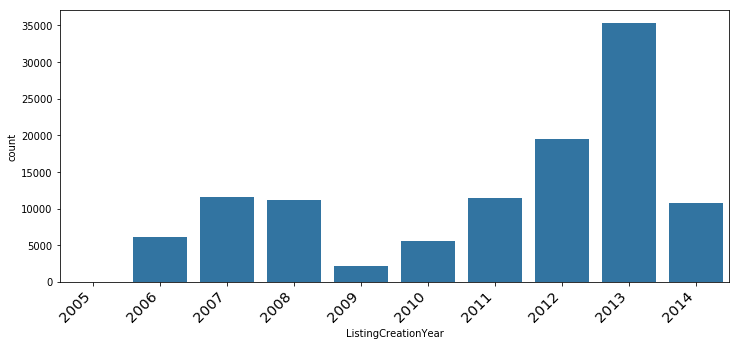

In [13]:
#Bar chart of number of loans borrowed by year
plt.figure(figsize=(12,5))
base_color = sn.color_palette()[0]
chart = sn.countplot(data = prosperLoans, x = 'ListingCreationYear', color = base_color)
chart.set_xticklabels(
    chart.get_xticklabels(), 
    rotation=45, 
    horizontalalignment='right',
    fontweight='light',
    fontsize='x-large')

## Bivariate Exploration

### Heat map 

In [14]:
numeric_vars = ['Term', 'BorrowerRate', 'StatedMonthlyIncome', 'LoanOriginalAmount','BorrowerAPR']
categoric_vars = ['EmploymentStatus', 'IncomeRange']

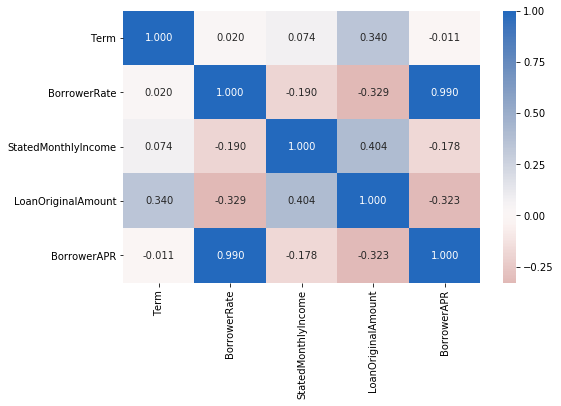

In [15]:
plt.figure(figsize = [8, 5])
sn.heatmap(prosperLoans[numeric_vars].corr(), annot = True, fmt = '.3f',
           cmap = 'vlag_r', center = 0)
plt.show()

It can be seen from the above heatmap that monthly income and borrower's interest rate are negatively correlated with a value of -0.329. It can also be seen that loan original amount is negatively correlated with Borrower's APR. Thus we can say that borrowers who loan for large amounts will be receiving smaller APR and interest rate.

It can also be seen that monthly income of the borrower is positively correlated with the loan original amount. The highest positive correlation is between borrower's interest rate and borrower's APR which makes sense as APR is nothing but interest rate plus fees.

### Clustered Bar chart of Employment Status versus Term

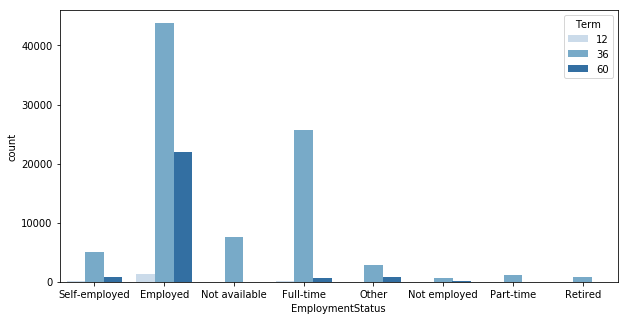

In [17]:
plt.figure(figsize = [10, 5])
sn.countplot(data = prosperLoans, x = 'EmploymentStatus', hue = 'Term', palette = 'Blues')

The above clustered bar chart shows that maximum number of borrowers were employed and had taken 36 month term loan, followed by those with employment status as full time. In every category, it can be observed that 36 month term loan is more common. Most frequently used term for loans borrowed was 36 months by employed and full time borrowers.

### Scatter plot of LoanOriginalAmount versus Borrower's APR

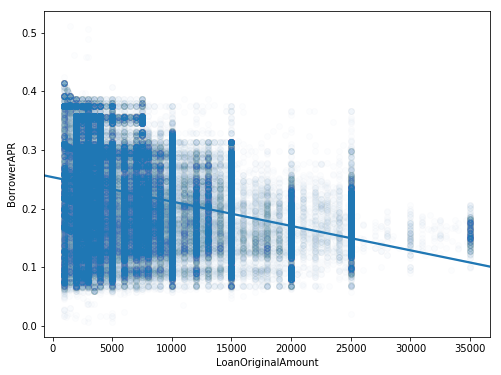

In [18]:
plt.figure(figsize = [8, 6])
sn.regplot(data = prosperLoans, x = 'LoanOriginalAmount', y = 'BorrowerAPR', scatter_kws={'alpha':0.01});

It can be seen that the range of APR is wider for small amounts of loan. This range becomes smaller and the APR reduces with large amounts of loan amount. Thus it can be seen that loan original amount is negatively correlated to Borrower's APR.

In [20]:
#Converting this categorical value into ordinal type
ordinal_var_dict = {'ProsperRating (Alpha)': ['AA','A','B','C','D','E','HR']}

for var in ordinal_var_dict:
    ordered_var = pd.api.types.CategoricalDtype(ordered = True,
                                                categories = ordinal_var_dict[var])
    prosperLoans[var] = prosperLoans[var].astype(ordered_var)

### Box Grid

<Figure size 720x720 with 0 Axes>

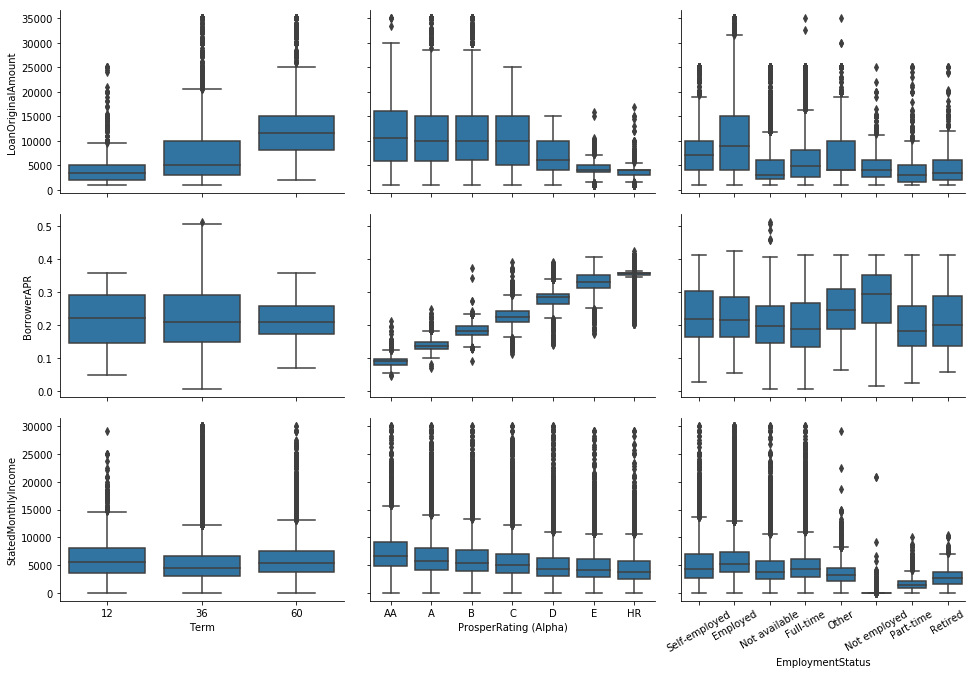

In [21]:
def boxgrid(x, y, **kwargs):
    """ Quick hack for creating box plots with seaborn's PairGrid. """
    default_color = sn.color_palette()[0]
    sn.boxplot(x, y, color = default_color)

plt.figure(figsize = [10, 10])
g = sn.PairGrid(data = prosperLoans, y_vars = ['LoanOriginalAmount', 'BorrowerAPR','StatedMonthlyIncome'], 
                x_vars = ['Term','ProsperRating (Alpha)','EmploymentStatus'],
                size = 3, aspect = 1.5)
g.map(boxgrid)
plt.xticks(rotation=30);
plt.show();

The above grid of Box plots explains the different relationships between categorical and numeric variables.

There seems to be a relationship between Loan original amount and term. Borrowers lending a large loan amount seem to take a long loan term.
Borrower's APR is higher for those rated lowest by Prosper Loans. (HR) Prosper Loan Rating has an impact on Borrower's APR.
Self-employed, employed and full time employed borrowers have a higher monthly income compared to others.

## Multivariate Exploration

### Scatter plot of LoanOriginalAmount versus Borrower's APR across different loan terms

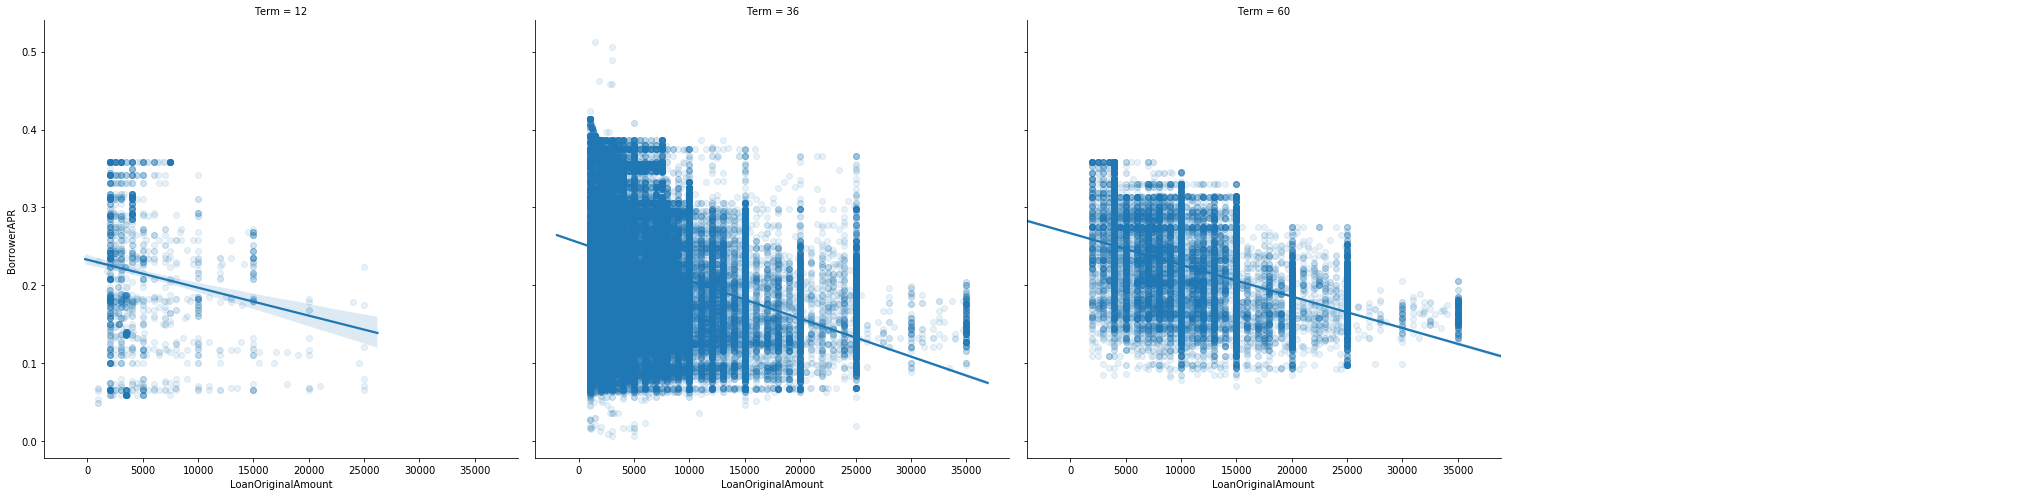

In [22]:
g=sn.FacetGrid(data=prosperLoans, aspect=1.0, height=7, col='Term', col_wrap=4)
g.map(sn.regplot, 'LoanOriginalAmount', 'BorrowerAPR', x_jitter=0.05, scatter_kws={'alpha':0.1});
g.add_legend();

It can be seen from the above multivariate scatter plot that maximum borrowers took a loan for the term of 36 months. The scatter plot is pretty dense compared to other plots. The range of Borrower's APR for the term 36 months is the broadest compared to other loan terms and most of the loan's original amount is between 0 to 10K. We can also see that with larger amounts of the loan, the range of borrower's APR decreases across all loan terms.

### Scatter plot of LoanOriginalAmount versus Borrower's APR across different Prosper Ratings

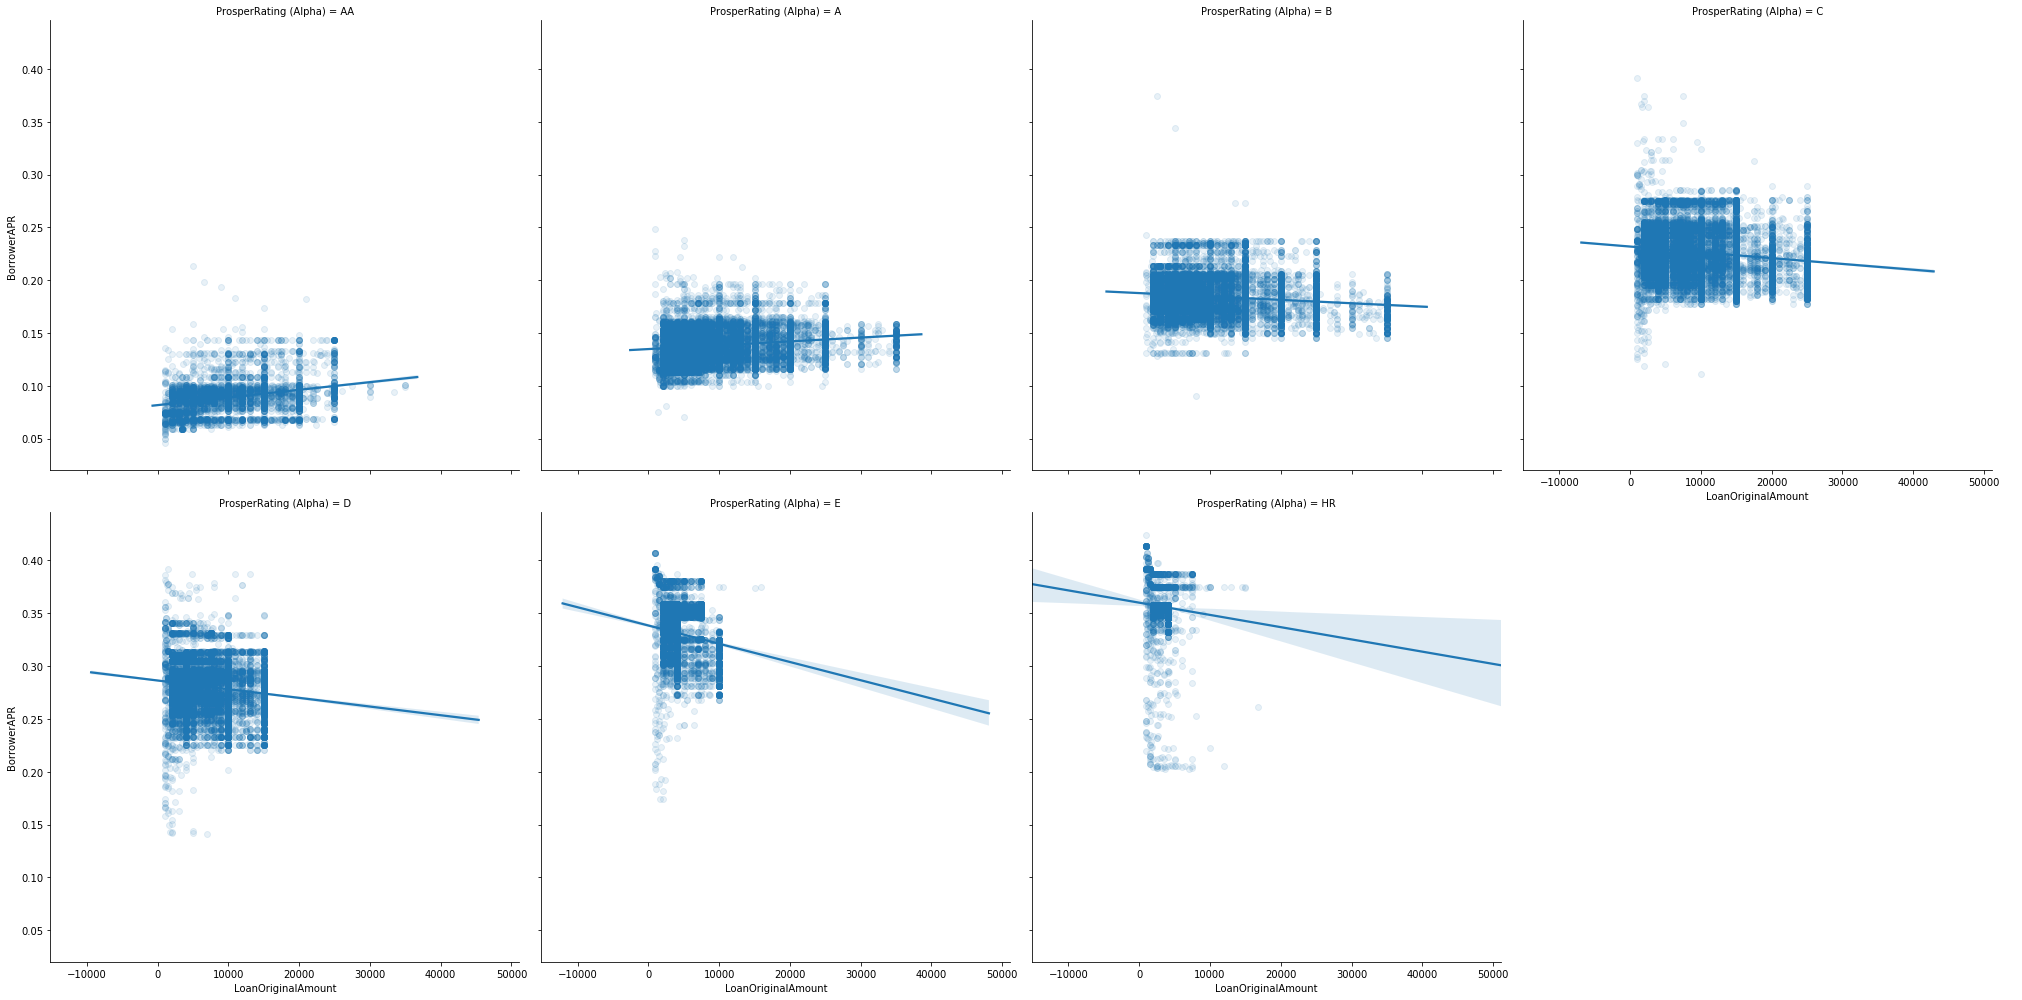

In [23]:
g=sn.FacetGrid(data=prosperLoans, aspect=1.0, height=7, col='ProsperRating (Alpha)', col_wrap=4)
g.map(sn.regplot, 'LoanOriginalAmount', 'BorrowerAPR', x_jitter=0.05, scatter_kws={'alpha':0.1});
g.add_legend();

The above is a scatter plot that visualizes borrower's APR versus loan's original amount across various Prosper Loan's rating system. It is interesting to see that the lowest borrower's APR is for those borrower's rated in the AA category. This keeps increasing as we go through all rating categories. The borrower's APR is the highest for categories D, E and HR.

It is also interesting to see that very borrowers fall in category HR. Maximum borrowers fall in the category A, B, C and D. At the same time as we go through plots for Prosper Rating A, B, C and D, the range of borrower's APR keeps increasing with the maximum range for borrowers categorized with rating HR. The smallest range is for those borrowers categorized in rating AA.

> Once you're ready to finish your presentation, check your output by using
nbconvert to export the notebook and set up a server for the slides. From the
terminal or command line, use the following expression:
> > `jupyter nbconvert <file_name>.ipynb --to slides --post serve --template output_toggle`

> This should open a tab in your web browser where you can scroll through your
presentation. Sub-slides can be accessed by pressing 'down' when viewing its parent
slide. Make sure you remove all of the quote-formatted guide notes like this one
before you finish your presentation!